### 1. Import Necessary Modules and Setup Dataset

In [2]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load the wine dataset
wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df['class'] = wine_data.target

# Display the first few rows of the dataframe
print(wine_df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  class  
0           

### 2. Splitting data intro train & test sets

In [3]:
# Split the dataset into training and testing sets
features = wine_df[wine_data.feature_names]
labels = wine_df['class']
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Shape of training features:", train_features.shape)
print("Shape of testing features:", test_features.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of testing labels:", test_labels.shape)


Shape of training features: (142, 13)
Shape of testing features: (36, 13)
Shape of training labels: (142,)
Shape of testing labels: (36,)


### 3. Training the Decision Tree Model

In [4]:
# Initialize and train the decision tree classifier with entropy criterion
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_tree.fit(train_features, train_labels)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### 4. Plotting and Visualizing

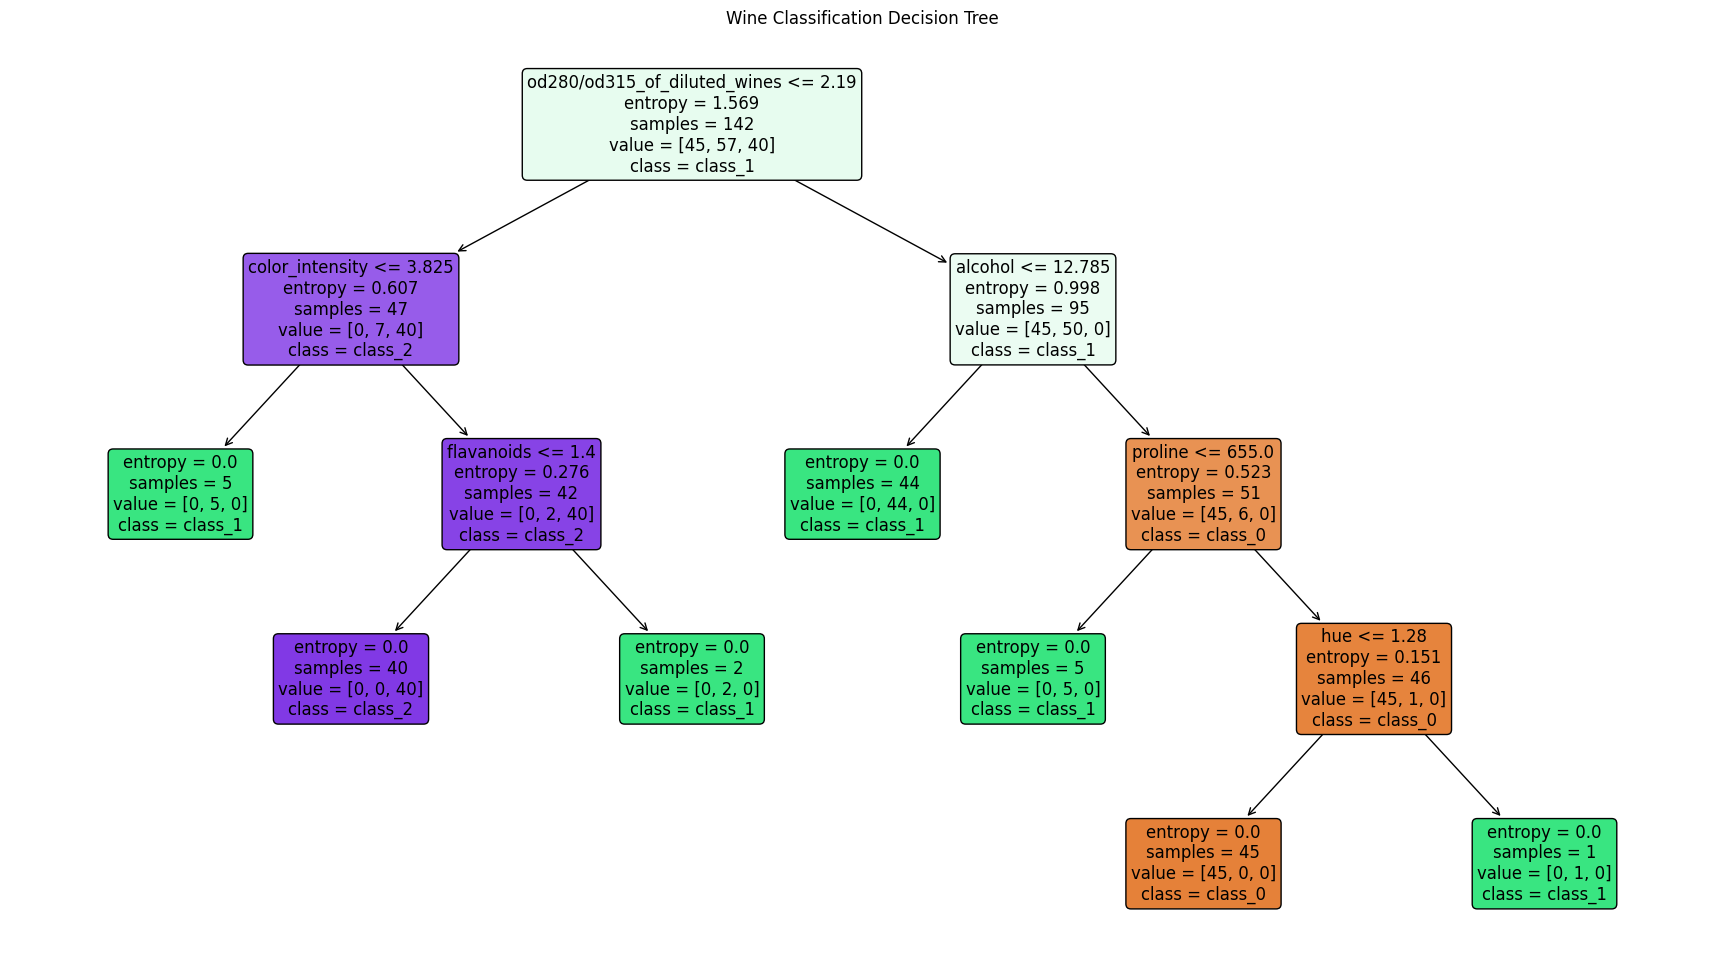

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set up a new figure for the decision tree visualization
plt.figure(figsize=(22,12))

# Plot the decision tree classifier
plot_tree(decision_tree, filled=True, feature_names=wine_data.feature_names, class_names=wine_data.target_names, rounded=True)
plt.title("Wine Classification Decision Tree")
plt.savefig("decision_tree_visualization.pdf")
plt.show()

### 5. Testing the Model

In [7]:
# Predict the target values for the test set
predicted_labels = decision_tree.predict(test_features)

# Calculate the accuracy
accuracy_score = (predicted_labels == test_labels).mean()
print(f"Classification accuracy: {accuracy_score:.2f}")

Classification accuracy: 0.92
